<a href="https://colab.research.google.com/github/dragonfist630/Calculator/blob/main/custom_YOLOv9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.0/871.0 kB 22.7 MB/s eta 0:00:00


In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov9c.pt")

100%|██████████| 49.4M/49.4M [00:01<00:00, 45.7MB/s]


In [ ]:
def predict(chosen_model, img, classes=[], conf=0.5):
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
        print('iniside predict function',results)
    else:
        results = chosen_model.predict(img, conf=conf)
        print('iniside predict function of else looop',results)
    return results

def predict_and_detect(chosen_model, img, classes=[], conf=0.5):
    results = predict(chosen_model, img, classes, conf)
    for result in results:
        for box in result.boxes:
            cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                          (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), 2)
            cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                        (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                        cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1)
    return img, results

Saving WIN_20240915_16_01_47_Pro.jpg to WIN_20240915_16_01_47_Pro (1).jpg

0: 384x640 2 persons, 1 teddy bear, 31.6ms
Speed: 1.9ms preprocess, 31.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
iniside predict function of else looop [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine

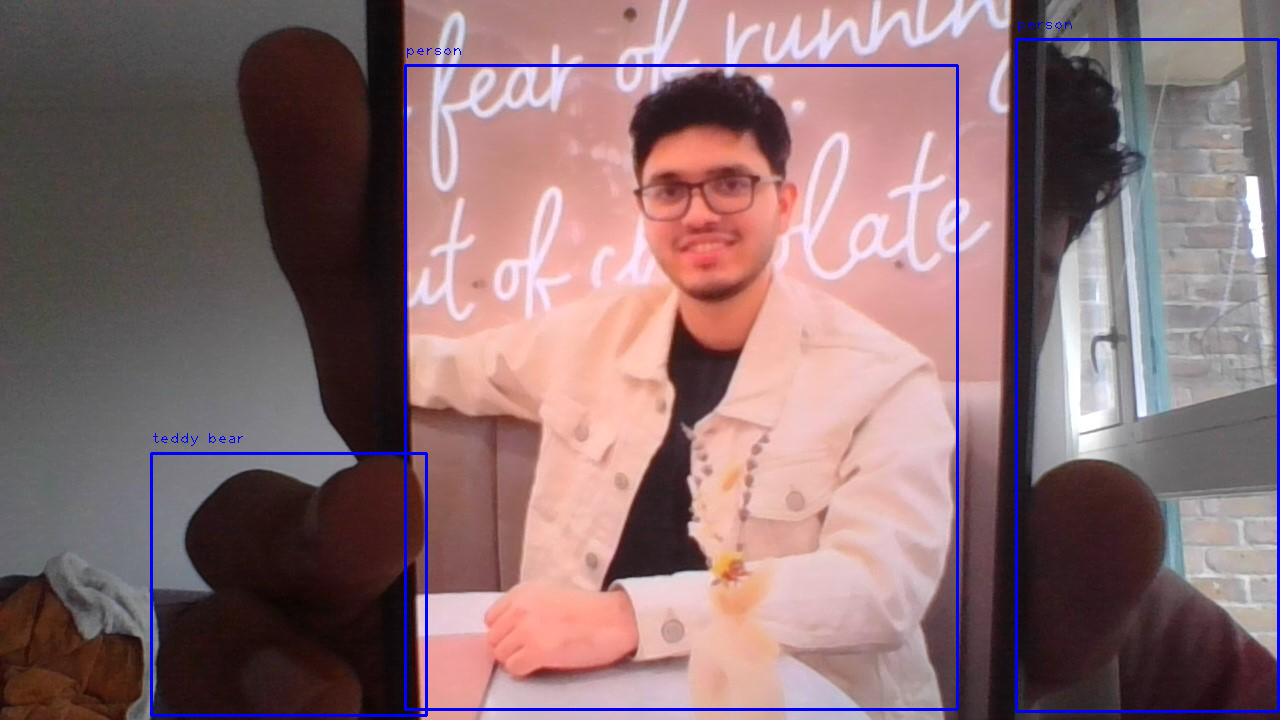

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the image using OpenCV
for filename in uploaded.keys():
    image = cv2.imread(filename)

# Detect objects
result_img, results = predict_and_detect(model, image, classes=[], conf=0.5)
print(results)
# Display the result
cv2_imshow(result_img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/Colab Notebooks/archive.zip"
extract_path = '/content/drive/MyDrive/Colab Notebooks/extracted_files'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
from collections import Counter

def get_top_predicted_items(results, n=3):
    # Initialize a list to store all detected class names
    items = []

    # Iterate over each result in the results list
    for result in results:
        # Iterate over each bounding box in the result
        for box in result.boxes:
            # Get the class ID of the detected object
            class_id = int(box.cls[0])
            # Append the class name to the items list
            items.append(result.names[class_id])

    # Use Counter to find the most common classes
   # top_items = Counter(items).most_common(n)

    return items

# Example usage:
# Assuming 'results' is obtained from predict_and_detect function
# results = predict_and_detect(model, img)
# # Get the top 3 predicted items
# top_3_predicted_items = get_top_predicted_items(results, 5)
# print(top_3_predicted_items)

In [ ]:
import os
image_directory = '/content/drive/MyDrive/Colab Notebooks/extracted_files/Car-Person Custom-Object-Detection-v2-Roboflow/train/images'
counter = 0
for filename in os.listdir(image_directory):
    print(filename)
    file_path = os.path.join(image_directory, filename)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        counter+=1
        img = cv2.imread(file_path)
        # Detect objects
        result_img, results = predict_and_detect(model, img, classes=[], conf=0.5)
        top_3_predicted_items = get_top_predicted_items(results)
        print(top_3_predicted_items)


In [ ]:
import yaml
dataset5c_info ={
    'train': '/content/drive/MyDrive/Colab Notebooks/extracted_files/Car-Person Custom-Object-Detection-v2-Roboflow/train',
    'val': '/content/drive/MyDrive/Colab Notebooks/extracted_files/Car-Person Custom-Object-Detection-v2-Roboflow/valid',
    'nc': 1,
    'names': ['Mobile_phone']
}
with open('/content/drive/MyDrive/Colab Notebooks/data5c.yaml', "w+") as file:
  doc = yaml.dump(dataset5c_info, file, default_flow_style= None, sort_keys = False)

In [ ]:
!yolo train model="/content/drive/MyDrive/Colab Notebooks/yolov9c.pt" data="/content/drive/MyDrive/Colab Notebooks/data5c.yaml" epochs=1 imgsz=640

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Colab Notebooks/yolov9c.pt, data=/content/drive/MyDrive/Colab Notebooks/data5c.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

In [ ]:
model2 = YOLO("/content/drive/MyDrive/Colab Notebooks/best.pt")

In [ ]:
import os
image_directory = '/content/drive/MyDrive/Colab Notebooks/extracted_files/Car-Person Custom-Object-Detection-v2-Roboflow/train/images'
counter = 0
for filename in os.listdir(image_directory):
    print(filename)
    file_path = os.path.join(image_directory, filename)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        counter+=1
        img = cv2.imread(file_path)
        # Detect objects
        result_img, results = predict_and_detect(model2, img, classes=[], conf=0.5) # what is the output structure???
        top_3_predicted_items = get_top_predicted_items(results)
        print(top_3_predicted_items)


b917e074f334d668_jpg.rf.0cf99922a1d8b6cf708de0e6c2c984fa.jpg

0: 640x352 4 Mobile_phones, 28.5ms
Speed: 2.9ms preprocess, 28.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 352)
['Mobile_phone', 'Mobile_phone', 'Mobile_phone', 'Mobile_phone']
b917e074f334d668_jpg.rf.93b0a1a4e5eca3cbb5bd8cbebe4a1fd9.jpg

0: 640x640 3 Mobile_phones, 45.6ms
Speed: 4.9ms preprocess, 45.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
['Mobile_phone', 'Mobile_phone', 'Mobile_phone']
b920cadc5e7414bf_jpg.rf.59051dde1dfaba5165a60cdf83d840cb.jpg

0: 640x640 5 Mobile_phones, 44.5ms
Speed: 4.7ms preprocess, 44.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
['Mobile_phone', 'Mobile_phone', 'Mobile_phone', 'Mobile_phone', 'Mobile_phone']
b920cadc5e7414bf_jpg.rf.da9d31f9a7cee566c2dda6e6bc7cb318.jpg

0: 640x640 5 Mobile_phones, 44.5ms
Speed: 3.6ms preprocess, 44.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
['Mobile_phone', 'Mobile_phon

KeyboardInterrupt: 

In [ ]:
# Uninstall existing versions
!pip uninstall -y tensorflow tensorflow-addons keras onnx onnx-tf

# Install compatible versions 2.16
!pip install tensorflow==2.16 tensorflow-addons==0.18.0 keras==2.9.0 onnx onnx-tf

Found existing installation: tensorflow 2.9.0
Uninstalling tensorflow-2.9.0:
  Successfully uninstalled tensorflow-2.9.0
Found existing installation: tensorflow-addons 0.18.0
Uninstalling tensorflow-addons-0.18.0:
  Successfully uninstalled tensorflow-addons-0.18.0
Found existing installation: keras 2.9.0
Uninstalling keras-2.9.0:
  Successfully uninstalled keras-2.9.0
Found existing installation: onnx 1.17.0
Uninstalling onnx-1.17.0:
  Successfully uninstalled onnx-1.17.0
Found existing installation: onnx-tf 1.10.0
Uninstalling onnx-tf-1.10.0:
  Successfully uninstalled onnx-tf-1.10.0
ERROR: Could not find a version that satisfies the requirement tensorflow==2.16 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.

# New section

In [ ]:
from pathlib import Path
import onnx
from scc4onnx import order_conversion
from onnxsim import simplify
from onnx_tf.backend import prepare

  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.3 MB/s eta 0:00:00
Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl (6.6 MB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-dat

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 23.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load the YOLOv9 model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/best.pt')
model.export(format="tfjs")

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv9c summary (fused): 402 layers, 21,146,195 parameters, 0 gradients, 82.7 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Colab Notebooks/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (41.2 MB)

TensorFlow SavedModel: starting export with tensorflow 2.17.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 9.1s, saved as '/content/drive/MyDrive/Colab Notebooks/best.onnx' (81.0 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 42.7s, saved as '/content/drive/MyDrive/Colab Notebooks/best_saved_model' (202.5 MB)

TensorFlow GraphDef: starting export with tensorflow 2.17.0...
TensorFlow GraphDef: export success ✅ 3.0s, saved as '/content/drive/MyDrive/Colab Notebooks/best.pb' (81.0 MB)

TensorFlow.js: starting export with tensorflowjs 4.21.

'/content/drive/MyDrive/Colab Notebooks/best_web_model'